# NutrIA – Run A: FE + Partial Fine-Tuning (30 couches)

Ce notebook implémente :
- **Phase 1** : Feature Extraction (3 epochs, LR=1e-3, base gelée)
- **Phase 2** : Partial Fine-Tuning (10 epochs, LR=1e-4, 30 dernières couches dégelées)

Objectif : Comparer avec le Full Fine-Tuning (Run B) sur base égale.

In [1]:
!pip install --upgrade pip

!pip install "tensorflow-datasets" matplotlib pandas scikit-learn "tensorflow[and-cuda]"

In [2]:
import tensorflow as tf

print("✅ TensorFlow version:", tf.__version__)

print("🖥️  GPUs disponibles:", tf.config.list_physical_devices("GPU"))

2025-12-11 19:56:00.226100: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-12-11 19:56:01.228299: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-12-11 19:56:04.548525: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


✅ TensorFlow version: 2.20.0
🖥️  GPUs disponibles: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


✅ TensorFlow version: 2.20.0
🖥️  GPUs disponibles: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

📥 Chargement du dataset Food-101...



I0000 00:00:1765483032.036329    9940 gpu_device.cc:2020] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:1e.0, compute capability: 7.5


Nombre de classes : 101
Exemples de classes : ['apple_pie', 'baby_back_ribs', 'baklava', 'beef_carpaccio', 'beef_tartare', 'beet_salad', 'beignets', 'bibimbap', 'bread_pudding', 'breakfast_burrito']


2025-12-11 19:57:12.369349: I tensorflow/core/kernels/data/tf_record_dataset_op.cc:396] The default buffer size is 262144, which is overridden by the user specified `buffer_size` of 8388608
2025-12-11 19:57:13.870280: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence



Aperçu tabulaire (train) :
         id  label_id      label_name
0  sample_0        18   chicken_curry
1  sample_1        70        pad_thai
2  sample_2         3  beef_carpaccio
3  sample_3        97        takoyaki
4  sample_4        69         oysters

🔍 Exemple d'images du dataset :


2025-12-11 19:57:14.161456: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


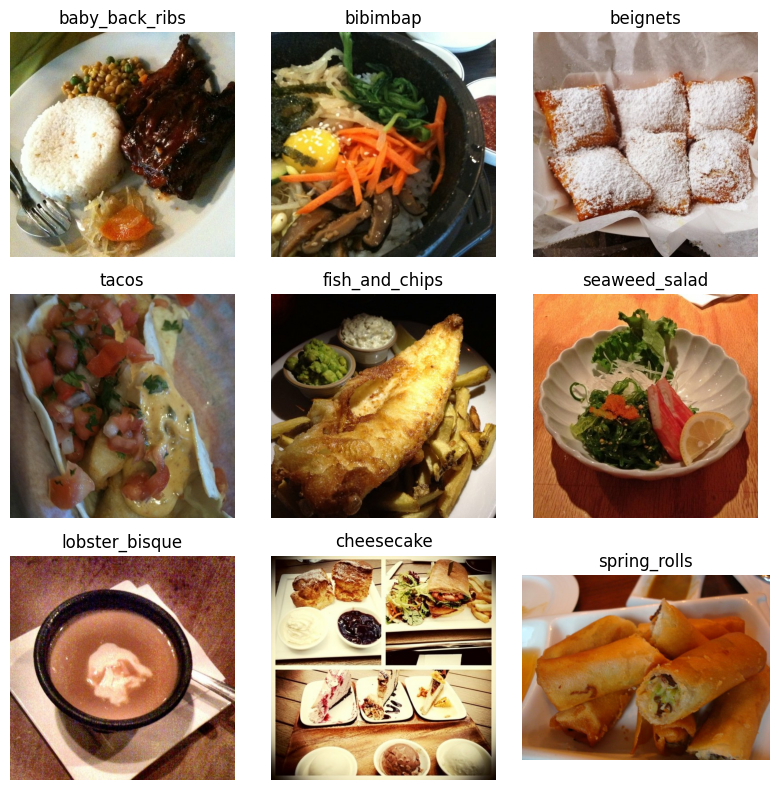


Taille estimée des splits :
Taille train (approx) : 68175
Taille val   (approx) : 7575
Taille test  (TFDS)   : 25250

✅ data_augmentation true

✅ Pipelines tf.data prêts (train / val / test).

 Architecture du modèle (base gelée) :


Model: "CaloriIA_MobileNetV2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ avg_pool                        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ predictions (Dense)             │ (None, 101)            │       129,381 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,387,365 (9.11 MB)

 Trainable params: 129,381 (505.39 KB)

 Non-trainable params: 2,257,984 (8.61 MB)


📦 PHASE 1 : FEATURE EXTRACTION (base gelée)

🚀 Entraînement Feature Extraction pour 3 epochs (LR=0.001)...
Epoch 1/3


2025-12-11 19:57:31.605274: I external/local_xla/xla/service/service.cc:163] XLA service 0x76fb4800ad70 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2025-12-11 19:57:31.605302: I external/local_xla/xla/service/service.cc:171]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
2025-12-11 19:57:31.883835: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2025-12-11 19:57:33.159765: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:473] Loaded cuDNN version 91002
2025-12-11 19:57:41.593729: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2025-12-11 19:57:41.732672: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time h

2129/2131 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step - accuracy: 0.3897 - loss: 2.5765

2025-12-11 20:02:32.804441: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2025-12-11 20:02:32.946128: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2025-12-11 20:02:33.082201: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.


2131/2131 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step - accuracy: 0.3897 - loss: 2.5761

2025-12-11 20:02:57.280131: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2025-12-11 20:02:57.418886: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.


2131/2131 ━━━━━━━━━━━━━━━━━━━━ 342s 148ms/step - accuracy: 0.4761 - loss: 2.1322 - val_accuracy: 0.5618 - val_loss: 1.7123
Epoch 2/3
2129/2131 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step - accuracy: 0.5803 - loss: 1.6476

2025-12-11 20:07:44.588928: W tensorflow/core/kernels/data/prefetch_autotuner.cc:55] Prefetch autotuner tried to allocate 33554688 bytes after encountering the first element of size 33554688 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


2131/2131 ━━━━━━━━━━━━━━━━━━━━ 293s 133ms/step - accuracy: 0.5775 - loss: 1.6591 - val_accuracy: 0.5838 - val_loss: 1.6351
Epoch 3/3
2129/2131 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step - accuracy: 0.6141 - loss: 1.4845

2025-12-11 20:12:39.940465: W tensorflow/core/kernels/data/prefetch_autotuner.cc:55] Prefetch autotuner tried to allocate 33554688 bytes after encountering the first element of size 33554688 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


2131/2131 ━━━━━━━━━━━━━━━━━━━━ 298s 136ms/step - accuracy: 0.6072 - loss: 1.5228 - val_accuracy: 0.5988 - val_loss: 1.5762

📈 Courbes d'entraînement – Phase 1 (Feature Extraction) :


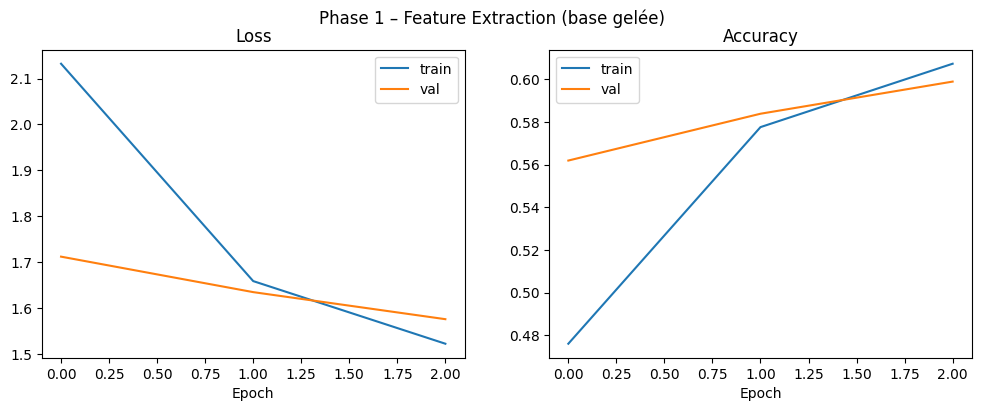


🧪 Évaluation après Feature Extraction...
789/790 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.6063 - loss: 1.4844

2025-12-11 20:14:00.686927: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2025-12-11 20:14:00.826681: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.


790/790 ━━━━━━━━━━━━━━━━━━━━ 50s 63ms/step - accuracy: 0.6064 - loss: 1.4859
✅ Test accuracy (après FE) : 0.6064
✅ Test loss     (après FE) : 1.4859

🔥 PHASE 2 : PARTIAL FINE-TUNING (30 dernières couches)

🔓 Couches dégelées : 30 / 154

🚀 Entraînement Partial Fine-Tuning pour 10 epochs (LR=0.0001)...
Epoch 1/10


2025-12-11 20:14:25.048259: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:453] ShuffleDatasetV3:216: Filling up shuffle buffer (this may take a while): 525 of 1000
2025-12-11 20:14:27.166709: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:483] Shuffle buffer filled.


2131/2131 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step - accuracy: 0.5731 - loss: 1.6628
Epoch 1: val_loss improved from None to 1.39987, saving model to best_model_partial_ft.keras
2131/2131 ━━━━━━━━━━━━━━━━━━━━ 322s 137ms/step - accuracy: 0.6141 - loss: 1.4836 - val_accuracy: 0.6455 - val_loss: 1.3999
Epoch 2/10


2025-12-11 20:19:37.453397: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:453] ShuffleDatasetV3:216: Filling up shuffle buffer (this may take a while): 565 of 1000
2025-12-11 20:19:39.512753: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:483] Shuffle buffer filled.


2131/2131 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step - accuracy: 0.7065 - loss: 1.0909
Epoch 2: val_loss improved from 1.39987 to 1.15122, saving model to best_model_partial_ft.keras
2131/2131 ━━━━━━━━━━━━━━━━━━━━ 296s 133ms/step - accuracy: 0.7090 - loss: 1.0798 - val_accuracy: 0.7024 - val_loss: 1.1512
Epoch 3/10


2025-12-11 20:24:33.906959: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:453] ShuffleDatasetV3:216: Filling up shuffle buffer (this may take a while): 470 of 1000


   1/2131 ━━━━━━━━━━━━━━━━━━━━ 7:27:41 13s/step - accuracy: 0.6875 - loss: 1.2061

2025-12-11 20:24:36.307236: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:483] Shuffle buffer filled.


2131/2131 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step - accuracy: 0.7644 - loss: 0.8566
Epoch 3: val_loss improved from 1.15122 to 0.93442, saving model to best_model_partial_ft.keras
2131/2131 ━━━━━━━━━━━━━━━━━━━━ 293s 132ms/step - accuracy: 0.7622 - loss: 0.8654 - val_accuracy: 0.7483 - val_loss: 0.9344
Epoch 4/10


2025-12-11 20:29:26.814167: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:453] ShuffleDatasetV3:216: Filling up shuffle buffer (this may take a while): 594 of 1000


   1/2131 ━━━━━━━━━━━━━━━━━━━━ 7:14:58 12s/step - accuracy: 0.8750 - loss: 0.7140

2025-12-11 20:29:28.855950: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:483] Shuffle buffer filled.


2131/2131 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step - accuracy: 0.8039 - loss: 0.7036
Epoch 4: val_loss improved from 0.93442 to 0.89814, saving model to best_model_partial_ft.keras
2131/2131 ━━━━━━━━━━━━━━━━━━━━ 290s 131ms/step - accuracy: 0.7994 - loss: 0.7171 - val_accuracy: 0.7599 - val_loss: 0.8981
Epoch 5/10


2025-12-11 20:34:17.089491: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:453] ShuffleDatasetV3:216: Filling up shuffle buffer (this may take a while): 496 of 1000


   1/2131 ━━━━━━━━━━━━━━━━━━━━ 7:26:08 13s/step - accuracy: 0.8750 - loss: 0.6363

2025-12-11 20:34:19.464481: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:483] Shuffle buffer filled.


2131/2131 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step - accuracy: 0.8394 - loss: 0.5817
Epoch 5: val_loss improved from 0.89814 to 0.67656, saving model to best_model_partial_ft.keras
2131/2131 ━━━━━━━━━━━━━━━━━━━━ 295s 133ms/step - accuracy: 0.8303 - loss: 0.6046 - val_accuracy: 0.8110 - val_loss: 0.6766
Epoch 6/10


2025-12-11 20:39:12.074124: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:453] ShuffleDatasetV3:216: Filling up shuffle buffer (this may take a while): 560 of 1000
2025-12-11 20:39:14.375805: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:483] Shuffle buffer filled.


2131/2131 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step - accuracy: 0.8662 - loss: 0.4831
Epoch 6: val_loss improved from 0.67656 to 0.67581, saving model to best_model_partial_ft.keras
2131/2131 ━━━━━━━━━━━━━━━━━━━━ 306s 138ms/step - accuracy: 0.8571 - loss: 0.5131 - val_accuracy: 0.8135 - val_loss: 0.6758
Epoch 7/10


2025-12-11 20:44:17.690109: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:453] ShuffleDatasetV3:216: Filling up shuffle buffer (this may take a while): 519 of 1000


   1/2131 ━━━━━━━━━━━━━━━━━━━━ 7:18:50 12s/step - accuracy: 0.9062 - loss: 0.3529

2025-12-11 20:44:19.825982: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:483] Shuffle buffer filled.


2131/2131 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step - accuracy: 0.8842 - loss: 0.4132
Epoch 7: val_loss improved from 0.67581 to 0.54723, saving model to best_model_partial_ft.keras
2131/2131 ━━━━━━━━━━━━━━━━━━━━ 293s 132ms/step - accuracy: 0.8749 - loss: 0.4458 - val_accuracy: 0.8500 - val_loss: 0.5472
Epoch 8/10


2025-12-11 20:49:10.664758: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:453] ShuffleDatasetV3:216: Filling up shuffle buffer (this may take a while): 513 of 1000
2025-12-11 20:49:13.104908: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:483] Shuffle buffer filled.


2131/2131 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step - accuracy: 0.9011 - loss: 0.3553
Epoch 8: val_loss improved from 0.54723 to 0.51192, saving model to best_model_partial_ft.keras
2131/2131 ━━━━━━━━━━━━━━━━━━━━ 291s 131ms/step - accuracy: 0.8914 - loss: 0.3868 - val_accuracy: 0.8512 - val_loss: 0.5119
Epoch 9/10


2025-12-11 20:54:01.464036: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:453] ShuffleDatasetV3:216: Filling up shuffle buffer (this may take a while): 521 of 1000


   1/2131 ━━━━━━━━━━━━━━━━━━━━ 7:17:36 12s/step - accuracy: 1.0000 - loss: 0.1192

2025-12-11 20:54:03.601101: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:483] Shuffle buffer filled.


2131/2131 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step - accuracy: 0.9141 - loss: 0.3091
Epoch 9: val_loss did not improve from 0.51192
2131/2131 ━━━━━━━━━━━━━━━━━━━━ 302s 136ms/step - accuracy: 0.9063 - loss: 0.3310 - val_accuracy: 0.8516 - val_loss: 0.5237
Epoch 10/10


2025-12-11 20:59:03.662382: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:453] ShuffleDatasetV3:216: Filling up shuffle buffer (this may take a while): 526 of 1000


   1/2131 ━━━━━━━━━━━━━━━━━━━━ 7:20:25 12s/step - accuracy: 0.8750 - loss: 0.2968

2025-12-11 20:59:05.820611: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:483] Shuffle buffer filled.


2131/2131 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step - accuracy: 0.9262 - loss: 0.2682
Epoch 10: val_loss improved from 0.51192 to 0.43147, saving model to best_model_partial_ft.keras
2131/2131 ━━━━━━━━━━━━━━━━━━━━ 292s 131ms/step - accuracy: 0.9184 - loss: 0.2901 - val_accuracy: 0.8785 - val_loss: 0.4315
Restoring model weights from the end of the best epoch: 10.

📈 Courbes d'entraînement – Phase 2 (Partial Fine-Tuning) :


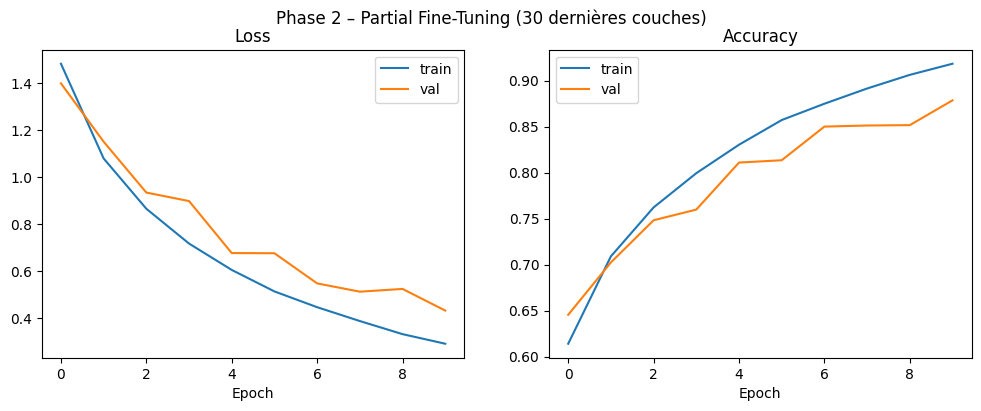


🧪 ÉVALUATION FINALE SUR LE TEST SET
790/790 ━━━━━━━━━━━━━━━━━━━━ 42s 53ms/step - accuracy: 0.7171 - loss: 1.1642

✅ Test accuracy (final) : 0.7171
✅ Test loss     (final) : 1.1642

📊 Récapitulatif :
  - Après Feature Extraction : acc = 0.6064
  - Après Partial Fine-Tuning: acc = 0.7171
  - Gain                     : +11.07%

📤 Génération des prédictions sur le test set...

📊 Rapport de classification :
                         precision    recall  f1-score   support

              apple_pie       0.51      0.40      0.45       250
         baby_back_ribs       0.90      0.63      0.74       250
                baklava       0.72      0.82      0.77       250
         beef_carpaccio       0.85      0.74      0.79       250
           beef_tartare       0.66      0.69      0.68       250
             beet_salad       0.58      0.61      0.60       250
               beignets       0.74      0.82      0.78       250
               bibimbap       0.88      0.86      0.87       250
       

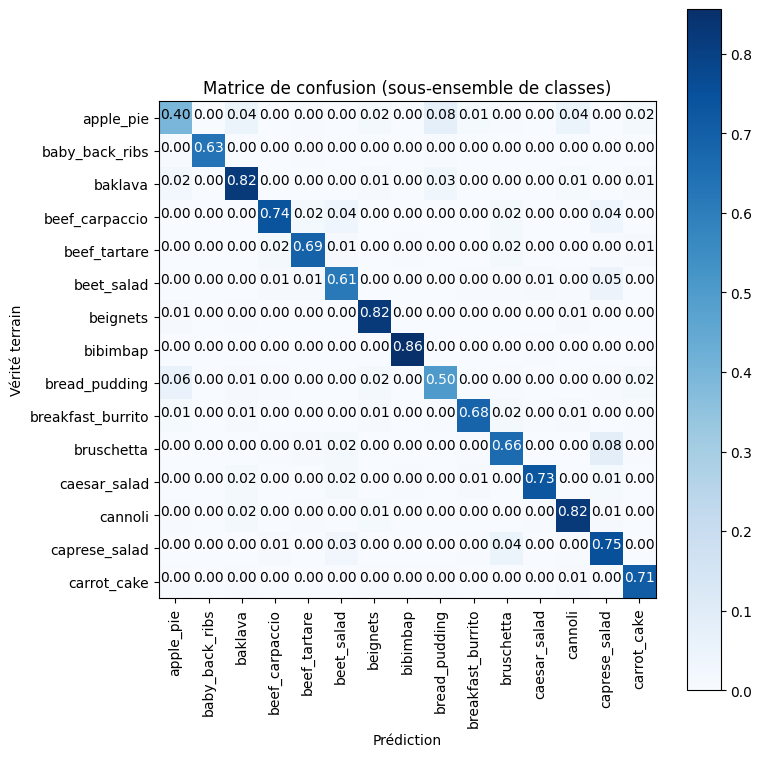

In [3]:
import tensorflow as tf
import tensorflow_datasets as tfds

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import itertools

from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras import layers, models

print("✅ TensorFlow version:", tf.__version__)
print("🖥️  GPUs disponibles:", tf.config.list_physical_devices("GPU"))

gpus = tf.config.list_physical_devices("GPU")
for gpu in gpus:
    try:
        tf.config.experimental.set_memory_growth(gpu, True)
    except Exception as e:
        print("⚠️ Impossible de régler memory_growth pour ce GPU :", e)

# -----------------------------
# Hyperparamètres globaux
# -----------------------------
AUTOTUNE   = tf.data.AUTOTUNE
IMG_SIZE   = (224, 224)
IMG_SHAPE  = IMG_SIZE + (3,)
BATCH_SIZE = 32

# -----------------------------
# Configuration
# -----------------------------
EPOCHS_FE   = 3    # Feature Extraction
EPOCHS_FT   = 10   # Fine-Tuning
LR_FE       = 1e-3 # Learning rate pour FE
LR_FT       = 1e-4 # Learning rate pour FT

print("\n📥 Chargement du dataset Food-101...\n")

# -----------------------------
# Chargement du dataset
# -----------------------------
(ds_train_raw, ds_test_raw), ds_info = tfds.load(
    "food101",
    split=["train", "validation"],
    shuffle_files=True,
    as_supervised=True,
    with_info=True,
)

class_names = ds_info.features["label"].names
num_classes = len(class_names)

print(f"Nombre de classes : {num_classes}")
print("Exemples de classes :", class_names[:10])


def ds_to_dataframe(ds, max_samples=1000):
    file_ids = []
    labels   = []
    for i, (_, label) in enumerate(ds.take(max_samples)):
        file_ids.append(f"sample_{i}")
        labels.append(int(label.numpy()))
    df = pd.DataFrame({"id": file_ids, "label_id": labels})
    df["label_name"] = df["label_id"].apply(lambda i: class_names[i])
    return df


df_train_preview = ds_to_dataframe(ds_train_raw, max_samples=2000)
print("\nAperçu tabulaire (train) :")
print(df_train_preview.head())


def show_examples(ds, class_names, n=9):
    plt.figure(figsize=(8, 8))
    for i, (image, label) in enumerate(ds.take(n)):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(image.numpy())
        plt.title(class_names[int(label.numpy())])
        plt.axis("off")
    plt.tight_layout()
    plt.show()


print("\n🔍 Exemple d'images du dataset :")
show_examples(ds_train_raw, class_names, n=9)

# -----------------------------
# Split Train / Val
# -----------------------------
VAL_RATIO = 0.1

ds_train_size = ds_info.splits["train"].num_examples
val_size = int(VAL_RATIO * ds_train_size)

ds_val   = ds_train_raw.take(val_size)
ds_train = ds_train_raw.skip(val_size)

print("\nTaille estimée des splits :")
print("Taille train (approx) :", ds_train_size - val_size)
print("Taille val   (approx) :", val_size)
print("Taille test  (TFDS)   :", ds_info.splits["validation"].num_examples)

# -----------------------------
# Prétraitement & Data Augmentation
# -----------------------------
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input

def preprocess_image(image, label):
    image = tf.image.resize(image, IMG_SIZE)
    image = tf.cast(image, tf.float32)
    image = preprocess_input(image)
    return image, label


data_augmentation = tf.keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomZoom(0.1),
    ],
    name="data_augmentation",
)

USE_dataAUG = True

def prepare_dataset(ds, training=True):
    ds = ds.map(preprocess_image, num_parallel_calls=AUTOTUNE)
    if training and USE_dataAUG:
        ds = ds.map(
            lambda x, y: (data_augmentation(x, training=True), y),
            num_parallel_calls=AUTOTUNE,
        )
        ds = ds.shuffle(1000)
        print("\n✅ data_augmentation true")
    elif training:
        ds = ds.shuffle(1000)

    ds = ds.batch(BATCH_SIZE)
    ds = ds.prefetch(AUTOTUNE)
    return ds


train_ds = prepare_dataset(ds_train, training=True)
val_ds   = prepare_dataset(ds_val, training=False)
test_ds  = prepare_dataset(ds_test_raw, training=False)

print("\n✅ Pipelines tf.data prêts (train / val / test).")

# -----------------------------
# Construction du modèle
# -----------------------------
base_model = tf.keras.applications.MobileNetV2(
    input_shape=IMG_SHAPE,
    include_top=False,
    weights="imagenet",
)

base_model.trainable = False  #  Base gelée pour Feature Extraction

global_avg_pool   = layers.GlobalAveragePooling2D(name="avg_pool")
prediction_layer  = layers.Dense(num_classes, activation="softmax", name="predictions")

inputs  = tf.keras.Input(shape=IMG_SHAPE)
x       = base_model(inputs, training=False)
x       = global_avg_pool(x)
outputs = prediction_layer(x)

model = tf.keras.Model(inputs, outputs, name="CaloriIA_MobileNetV2")

print("\n Architecture du modèle (base gelée) :")
model.summary()

# =====================================================
# PHASE 1 : FEATURE EXTRACTION (base gelée)
# =====================================================
print("\n" + "="*60)
print("📦 PHASE 1 : FEATURE EXTRACTION (base gelée)")
print("="*60)

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=LR_FE),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"],
)

print(f"\n🚀 Entraînement Feature Extraction pour {EPOCHS_FE} epochs (LR={LR_FE})...")
history_fe = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=EPOCHS_FE,
)


def plot_history(history, title="Historique d'entraînement"):
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(history.history["loss"], label="train")
    plt.plot(history.history["val_loss"], label="val")
    plt.title("Loss")
    plt.xlabel("Epoch")
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history["accuracy"], label="train")
    plt.plot(history.history["val_accuracy"], label="val")
    plt.title("Accuracy")
    plt.xlabel("Epoch")
    plt.legend()

    plt.suptitle(title)
    plt.show()


print("\n📈 Courbes d'entraînement – Phase 1 (Feature Extraction) :")
plot_history(history_fe, title="Phase 1 – Feature Extraction (base gelée)")

print("\n🧪 Évaluation après Feature Extraction...")
test_loss_fe, test_acc_fe = model.evaluate(test_ds)
print(f"✅ Test accuracy (après FE) : {test_acc_fe:.4f}")
print(f"✅ Test loss     (après FE) : {test_loss_fe:.4f}")

# =====================================================
# PHASE 2 : PARTIAL FINE-TUNING (30 dernières couches)
# =====================================================
print("\n" + "="*60)
print("🔥 PHASE 2 : PARTIAL FINE-TUNING (30 dernières couches)")
print("="*60)

base_model.trainable = True

# Dégeler uniquement les 30 dernières couches
fine_tune_at = len(base_model.layers) - 30

for i, layer in enumerate(base_model.layers):
    if i < fine_tune_at:
        layer.trainable = False
    else:
        layer.trainable = True

num_trainable = sum([layer.trainable for layer in base_model.layers])
print(f"\n🔓 Couches dégelées : {num_trainable} / {len(base_model.layers)}")

# Callbacks
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint(
    "best_model_partial_ft.keras",
    monitor="val_loss",
    save_best_only=True,
    verbose=1
)

early_stopping_cb = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    patience=3,
    restore_best_weights=True,
    verbose=1
)

# Recompilation avec LR plus bas
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=LR_FT),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"],
)

print(f"\n🚀 Entraînement Partial Fine-Tuning pour {EPOCHS_FT} epochs (LR={LR_FT})...")
history_ft = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=EPOCHS_FT,
    callbacks=[checkpoint_cb, early_stopping_cb],
)

print("\n📈 Courbes d'entraînement – Phase 2 (Partial Fine-Tuning) :")
plot_history(history_ft, title="Phase 2 – Partial Fine-Tuning (30 dernières couches)")

# =====================================================
# ÉVALUATION FINALE
# =====================================================
print("\n" + "="*60)
print("🧪 ÉVALUATION FINALE SUR LE TEST SET")
print("="*60)

test_loss, test_acc = model.evaluate(test_ds)
print(f"\n✅ Test accuracy (final) : {test_acc:.4f}")
print(f"✅ Test loss     (final) : {test_loss:.4f}")

print("\n📊 Récapitulatif :")
print(f"  - Après Feature Extraction : acc = {test_acc_fe:.4f}")
print(f"  - Après Partial Fine-Tuning: acc = {test_acc:.4f}")
print(f"  - Gain                     : +{(test_acc - test_acc_fe)*100:.2f}%")

# -----------------------------
# Rapport de classification
# -----------------------------
y_true = []
y_pred = []

print("\n📤 Génération des prédictions sur le test set...")
for images, labels in test_ds:
    preds = model.predict(images, verbose=0)
    y_true.extend(labels.numpy())
    y_pred.extend(np.argmax(preds, axis=1))

y_true = np.array(y_true)
y_pred = np.array(y_pred)

print("\n📊 Rapport de classification :")
print(classification_report(y_true, y_pred, target_names=class_names))

cm = confusion_matrix(y_true, y_pred)
cm_norm = cm.astype("float") / cm.sum(axis=1, keepdims=True)


def plot_confusion_matrix(cm, class_names, normalize=True, max_classes=15):
    num_classes = min(len(class_names), max_classes)
    cm_plot = cm[:num_classes, :num_classes]
    labels_plot = class_names[:num_classes]

    plt.figure(figsize=(8, 8))
    plt.imshow(cm_plot, interpolation="nearest", cmap=plt.cm.Blues)
    plt.title("Matrice de confusion (sous-ensemble de classes)")
    plt.colorbar()
    tick_marks = np.arange(num_classes)
    plt.xticks(tick_marks, labels_plot, rotation=90)
    plt.yticks(ticks=tick_marks, labels=labels_plot)

    fmt = ".2f" if normalize else "d"
    thresh = cm_plot.max() / 2.0
    for i, j in itertools.product(range(cm_plot.shape[0]), range(cm_plot.shape[1])):
        plt.text(
            j,
            i,
            format(cm_plot[i, j], fmt),
            horizontalalignment="center",
            color="white" if cm_plot[i, j] > thresh else "black",
        )

    plt.ylabel("Vérité terrain")
    plt.xlabel("Prédiction")
    plt.tight_layout()
    plt.show()


print("\n📉 Matrice de confusion (normalisée) – 15 premières classes :")
plot_confusion_matrix(cm_norm, class_names, normalize=True, max_classes=15)

In [4]:
import os
import tensorflow as tf

os.makedirs("models", exist_ok=True)

MODEL_PATH = "models/caloriia_FE_PartialFT_10ep.keras"
model.save(MODEL_PATH)

print(f"✅ Modèle sauvegardé : {MODEL_PATH}")

✅ Modèle sauvegardé : models/caloriia_FE_PartialFT_10ep.keras
